In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-support-ticket-dataset/customer_support_tickets.csv


In [6]:
df=pd.read_csv('/kaggle/input/customer-support-ticket-dataset/customer_support_tickets.csv')

In [7]:
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [10]:
def data(data1):
    print(data1.shape)
    print(data1.ndim)
    print(data1.columns)
data(df)

(8469, 17)
2
Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ticket ID,8469.0,4235.000000,2444.934048,1.0,2118.0,4235.0,6352.0,8469.0
Customer Age,8469.0,44.026804,15.296112,18.0,31.0,44.0,57.0,70.0
Customer Satisfaction Rating,2769.0,2.991333,1.407016,1.0,2.0,3.0,4.0,5.0


In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [15]:
df.select_dtypes(include=['int64','float64'])

,Ticket ID,Customer Age,Customer Satisfaction Rating
0,1,32,NaN
1,2,42,NaN
2,3,48,3.0
3,4,27,3.0
4,5,67,1.0
...,...,...,...
8464,8465,22,NaN
8465,8466,27,NaN
8466,8467,57,3.0
8467,8468,54,3.0


In [16]:
df.select_dtypes(include=['object'])

,Customer Name,Customer Email,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,Marisa Obrien,carrollallison@example.com,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN
1,Jessica Rios,clarkeashley@example.com,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN
2,Christopher Robbins,gonzalestracy@example.com,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38
3,Christina Dillon,bradleyolson@example.org,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40
4,Alexander Carroll,bradleymark@example.com,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,David Todd,adam28@example.net,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN
8465,Lori Davis,russell68@example.com,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN
8466,Michelle Kelley,ashley83@example.org,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22
8467,Steven Rodriguez,fpowell@example.org,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24


In [17]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [19]:
import seaborn as sns

<Axes: >

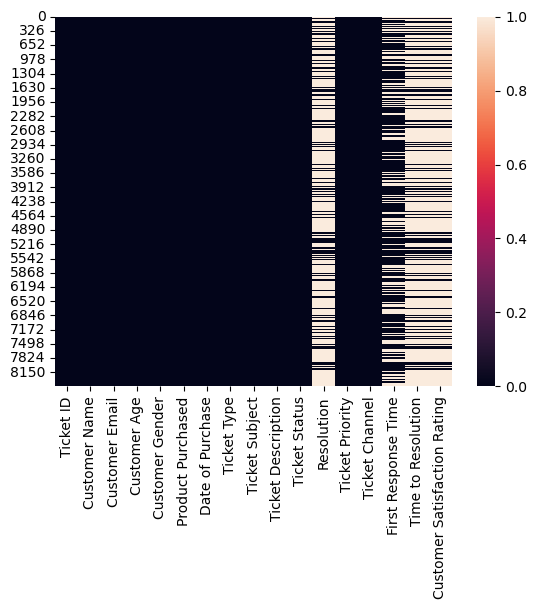

In [20]:
sns.heatmap(df.isnull())

In [24]:
df.fillna(0,inplace=True)

In [25]:
df.isnull().sum()

Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64

<Axes: >

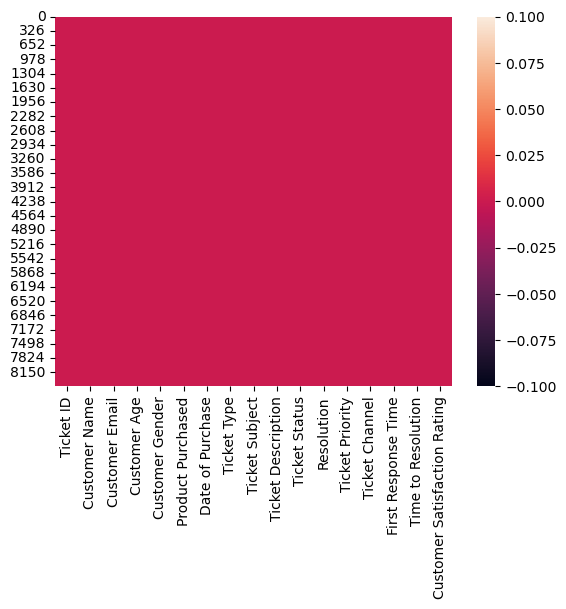

In [26]:
sns.heatmap(df.isnull())

In [28]:
df.count()

Ticket ID                       8469
Customer Name                   8469
Customer Email                  8469
Customer Age                    8469
Customer Gender                 8469
Product Purchased               8469
Date of Purchase                8469
Ticket Type                     8469
Ticket Subject                  8469
Ticket Description              8469
Ticket Status                   8469
Resolution                      8469
Ticket Priority                 8469
Ticket Channel                  8469
First Response Time             8469
Time to Resolution              8469
Customer Satisfaction Rating    8469
dtype: int64

In [29]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [30]:
df['Customer Gender'].value_counts()

Male      2896
Female    2887
Other     2686
Name: Customer Gender, dtype: int64

In [33]:
df['Customer Gender'].isin(['Male','Female']).count()

8469

In [34]:
df.head(2)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,0,Critical,Social media,2023-06-01 12:15:36,0,2.991333
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,0,Critical,Chat,2023-06-01 16:45:38,0,2.991333


In [36]:
df.sort_values('Customer Satisfaction Rating', ascending=False)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
1382,1383,Darren Ingram,grayerin@example.org,65,Female,Samsung Soundbar,2020-05-10,Product inquiry,Network problem,There seems to be a glitch in the {product_pur...,Closed,Growth whole dream site foreign with center.,Critical,Email,2023-06-01 10:38:21,2023-06-01 18:56:21,5.0
7893,7894,Morgan Cuevas,kwiley@example.org,55,Male,Google Nest,2020-03-20,Product inquiry,Network problem,I've encountered a data loss issue with my {pr...,Closed,Money audience degree color popular.,High,Social media,2023-06-01 05:27:05,2023-06-01 14:29:05,5.0
7919,7920,Brandon Ford,csimmons@example.net,60,Other,Autodesk AutoCAD,2021-09-13,Technical issue,Software bug,I'm having an issue with the {product_purchase...,Closed,Down weight it game grow.,Low,Email,2023-06-01 11:09:39,2023-06-01 13:25:39,5.0
2142,2143,Ashley Boyd,melaniebradley@example.com,50,Female,Canon EOS,2020-05-23,Technical issue,Battery life,I'm encountering a software bug in the {produc...,Closed,Could six daughter develop administration.,Critical,Chat,2023-06-01 10:53:10,2023-06-01 11:24:10,5.0
4024,4025,Patrick Rhodes,lopezdaniel@example.org,64,Male,Asus ROG,2021-11-28,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Important sell account per civil.,Low,Phone,2023-06-01 00:10:09,2023-06-01 09:04:09,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,5210,Shelby Taylor,wilkinsoncarol@example.net,41,Female,Philips Hue Lights,2020-09-19,Product inquiry,Battery life,I'm having an issue with the {product_purchase...,Closed,Model despite ago too back far.,Medium,Email,2023-06-01 18:34:08,2023-06-01 06:16:08,1.0
3512,3513,Brittany Lane,robert12@example.com,61,Other,Fitbit Charge,2020-01-26,Technical issue,Delivery problem,My {product_purchased} is making strange noise...,Closed,Enter seven bag protect.,High,Social media,2023-06-01 15:21:28,2023-06-01 04:49:28,1.0
3513,3514,Austin Campbell,kshaw@example.net,61,Female,Apple AirPods,2021-06-01,Technical issue,Peripheral compatibility,There seems to be a glitch in the {product_pur...,Closed,Rock or size ok like position else ok.,Low,Phone,2023-06-01 17:28:29,2023-06-01 18:39:29,1.0
7358,7359,Adam Hamilton,lindonna@example.org,59,Male,Microsoft Surface,2020-12-02,Billing inquiry,Battery life,I've encountered a data loss issue with my {pr...,Closed,Type almost husband policy.,Medium,Phone,2023-06-01 19:56:34,2023-06-01 01:00:34,1.0


In [40]:
df.groupby('Customer Gender').min().sort_values('Customer Age',ascending=False)

/tmp/ipykernel_32/2280063619.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  df.groupby('Customer Gender').min().sort_values('Customer Age',ascending=False)


,Ticket ID,Customer Name,Customer Email,Customer Age,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,Customer Satisfaction Rating
Customer Gender,,,,,,,,,,,,,
Female,2,Aaron Adams,aaron01@example.com,18,Adobe Photoshop,2020-01-01,Billing inquiry,Account access,I'm encountering a software bug in the {produc...,Closed,Critical,Chat,1.0
Male,6,Aaron Abbott,aanderson@example.com,18,Adobe Photoshop,2020-01-01,Billing inquiry,Account access,I'm encountering a software bug in the {produc...,Closed,Critical,Chat,1.0
Other,1,Aaron Dixon,aanderson@example.net,18,Adobe Photoshop,2020-01-01,Billing inquiry,Account access,I'm encountering a software bug in the {produc...,Closed,Critical,Chat,1.0


In [46]:
df['Ticket Status'].value_counts()

Pending Customer Response    2881
Open                         2819
Closed                       2769
Name: Ticket Status, dtype: int64

In [47]:
df.sort_values('Ticket Status', ascending=False)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,0,Critical,Social media,2023-06-01 12:15:36,0,2.991333
5936,5937,Robert Allison,swood@example.com,25,Other,Sony Xperia,2021-05-19,Billing inquiry,Refund request,I'm having an issue with the {product_purchase...,Pending Customer Response,0,Medium,Phone,2023-06-01 14:56:06,0,2.991333
5933,5934,Robert Russell,vjenkins@example.com,28,Other,Samsung Soundbar,2021-02-08,Product inquiry,Data loss,"My {product_purchased} crashed, and I lost all...",Pending Customer Response,0,High,Chat,2023-06-01 06:19:01,0,2.991333
5932,5933,Miranda Roberts,robert52@example.com,69,Male,Philips Hue Lights,2020-12-25,Billing inquiry,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,0,Medium,Social media,2023-06-01 18:38:00,0,2.991333
5931,5932,Anita Roberts,thomas15@example.net,38,Male,Amazon Echo,2021-12-24,Billing inquiry,Display issue,I'm having an issue with the {product_purchase...,Pending Customer Response,0,Medium,Chat,2023-06-01 23:46:59,0,2.991333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,2549,Jennifer Massey,ojohnson@example.com,38,Other,Samsung Galaxy,2021-12-06,Refund request,Network problem,I'm having an issue with the {product_purchase...,Closed,Billion budget necessary catch.,Low,Email,2023-06-01 01:00:33,2023-06-01 10:09:33,5.000000
2547,2548,Terri Howard,cbrown@example.net,48,Female,Adobe Photoshop,2020-05-08,Product inquiry,Display issue,I'm having an issue with the {product_purchase...,Closed,Memory paper foot wife month help even.,High,Phone,2023-06-01 15:04:31,2023-06-01 13:23:31,3.000000
5968,5969,Janet Lewis,bperkins@example.net,59,Female,Dyson Vacuum Cleaner,2020-09-17,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Closed,Drive best position woman can color sense.,Medium,Social media,2023-06-01 09:38:47,2023-06-01 13:07:47,5.000000
5970,5971,Mary Bell,hodgesnicholas@example.com,47,Male,Asus ROG,2020-10-25,Cancellation request,Account access,I'm having an issue with the {product_purchase...,Closed,Top find whether should price involve upon.,Low,Email,2023-06-01 05:59:50,2023-06-01 01:33:50,4.000000


In [45]:
df[(df['Customer Gender']=='Female') & (df['Ticket Status']=='Open') | (df['Customer Age'] < 39)]

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,0,Critical,Social media,2023-06-01 12:15:36,0,2.991333
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.000000
6,7,Jacqueline Wright,donaldkeith@example.org,24,Other,Microsoft Surface,2020-02-23,Product inquiry,Refund request,I'm unable to access my {product_purchased} ac...,Open,0,Critical,Social media,0,0,2.991333
7,8,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,Open,0,Critical,Social media,0,0,2.991333
9,10,William Dawson,clopez@example.com,27,Male,Dyson Vacuum Cleaner,2020-03-06,Refund request,Payment issue,My {product_purchased} is making strange noise...,Pending Customer Response,0,Critical,Phone,2023-06-01 09:25:48,0,2.991333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,8457,Jackson Strong,hannah96@example.com,18,Female,Dyson Vacuum Cleaner,2021-04-08,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Open,0,Critical,Social media,0,0,2.991333
8460,8461,Trevor Perry,daniellowe@example.org,25,Female,Apple AirPods,2021-08-23,Billing inquiry,Display issue,I've accidentally deleted important data from ...,Open,0,High,Social media,0,0,2.991333
8461,8462,William Shaw,christinebrown@example.net,28,Female,Microsoft Office,2021-10-21,Refund request,Payment issue,I'm having an issue with the {product_purchase...,Open,0,Medium,Phone,0,0,2.991333
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,0,Low,Phone,0,0,2.991333


In [48]:
df.loc[(df['Customer Age'] ==20) & (df['Product Purchased']=='Apple AirPods')]

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
2105,2106,John Carter,udunlap@example.org,20,Female,Apple AirPods,2021-05-18,Billing inquiry,Product recommendation,I'm having an issue with the {product_purchase...,Open,0,High,Phone,0,0,2.991333
3459,3460,Walter Fox,patrickking@example.net,20,Female,Apple AirPods,2021-05-08,Product inquiry,Battery life,I'm having an issue with the {product_purchase...,Closed,Mouth hear wonder partner compare.,High,Chat,2023-06-01 18:31:19,2023-06-01 15:48:19,4.000000
4678,4679,Lisa Noble,patricia66@example.org,20,Other,Apple AirPods,2021-06-27,Refund request,Installation support,I'm having an issue with the {product_purchase...,Open,0,Critical,Email,0,0,2.991333
7032,7033,Kristin Morgan,villarreallinda@example.org,20,Other,Apple AirPods,2020-02-29,Refund request,Data loss,I'm having an issue with the {product_purchase...,Pending Customer Response,0,Medium,Chat,2023-06-01 15:42:02,0,2.991333
7103,7104,Ashley Nguyen,michelejordan@example.org,20,Female,Apple AirPods,2021-09-08,Billing inquiry,Delivery problem,I'm having an issue with the {product_purchase...,Open,0,Critical,Chat,0,0,2.991333
7131,7132,Jessica Thomas,iroman@example.org,20,Male,Apple AirPods,2021-04-02,Refund request,Delivery problem,"I've recently set up my {product_purchased}, b...",Closed,Population factor moment reason event group.,Low,Chat,2023-06-01 20:28:14,2023-06-01 20:38:14,3.000000
7502,7503,Margaret Glover,mariah89@example.net,20,Male,Apple AirPods,2020-01-11,Billing inquiry,Refund request,I'm having an issue with the {product_purchase...,Open,0,Critical,Phone,0,0,2.991333
8316,8317,Catherine Atkins,laura58@example.net,20,Female,Apple AirPods,2021-08-31,Technical issue,Software bug,I'm having an issue with the {product_purchase...,Open,0,High,Email,0,0,2.991333


TypeError: Could not convert Billing inquiryBilling inquiryTechnical issueCancellation requestProduct inquiryBilling inquiryBilling inquiryBilling inquiryCancellation requestTechnical issueCancellation requestBilling inquiryBilling inquiryCancellation requestBilling inquiryTechnical issueBilling inquiryCancellation requestTechnical issueProduct inquiryProduct inquiryProduct inquiryBilling inquiryCancellation requestCancellation requestBilling inquiryRefund requestTechnical issueBilling inquiryProduct inquiryCancellation requestTechnical issueRefund requestRefund requestTechnical issueBilling inquiryCancellation requestRefund requestProduct inquiryProduct inquiryBilling inquiryRefund requestProduct inquiryCancellation requestTechnical issueProduct inquiryCancellation requestProduct inquiryProduct inquiryTechnical issueBilling inquiryCancellation requestProduct inquiryCancellation requestTechnical issueProduct inquiryCancellation requestProduct inquiryRefund requestRefund requestRefund requestTechnical issueTechnical issueCancellation requestTechnical issueRefund requestTechnical issueProduct inquiryTechnical issueRefund requestProduct inquiryBilling inquiryRefund requestProduct inquiryProduct inquiryTechnical issueCancellation requestCancellation requestRefund requestTechnical issueProduct inquiryProduct inquiryTechnical issueProduct inquiryBilling inquiryCancellation requestTechnical issueRefund requestCancellation requestCancellation requestBilling inquiryBilling inquiryProduct inquiryCancellation requestTechnical issueCancellation requestBilling inquiryBilling inquiryTechnical issueTechnical issueRefund requestBilling inquiryRefund requestTechnical issueRefund requestProduct inquiryRefund requestProduct inquiryCancellation requestRefund requestBilling inquiryProduct inquiryCancellation requestBilling inquiryCancellation requestRefund requestProduct inquiryCancellation requestRefund requestTechnical issueProduct inquiryCancellation requestCancellation requestTechnical issueCancellation requestRefund requestRefund requestTechnical issueTechnical issueProduct inquiryTechnical issueRefund requestRefund requestProduct inquiryTechnical issueRefund requestTechnical issueBilling inquiryBilling inquiryRefund requestTechnical issueProduct inquiryBilling inquiryBilling inquiryCancellation requestCancellation requestCancellation requestCancellation requestRefund requestRefund requestTechnical issueCancellation requestCancellation requestRefund requestBilling inquiryRefund requestCancellation requestBilling inquiryCancellation requestRefund requestRefund requestCancellation requestBilling inquiryTechnical issueTechnical issueBilling inquiryTechnical issueBilling inquiryProduct inquiryRefund requestBilling inquiryProduct inquiryBilling inquiryBilling inquiryTechnical issueProduct inquiryCancellation requestRefund requestBilling inquiryBilling inquiryRefund request to numeric